# **Zomato_analysis**
We will develop a predictor model to find out the popularity and success a new restaurant can generate with an extensive study. This study aims to offer huge insights on which factors determine the success of a new restaurant and predict ratings for newer restaurants

The given dataset contains data about all the Zomato orders particularly in Bangalore Restuarants. 

In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# **EDA and Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
#dropping irrelevant columns
df1=df.drop(['url','address','phone','dish_liked', 'menu_item', 'reviews_list'],axis=1) 

In [8]:
#Removing the Duplicates
df1.duplicated().sum()
df1.drop_duplicates(inplace=True)

In [9]:
#Remove the NaN values from the dataset
df1.isnull().sum()
df1.dropna(how='any',inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43447 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43447 non-null  object
 1   online_order                 43447 non-null  object
 2   book_table                   43447 non-null  object
 3   rate                         43447 non-null  object
 4   votes                        43447 non-null  int64 
 5   location                     43447 non-null  object
 6   rest_type                    43447 non-null  object
 7   cuisines                     43447 non-null  object
 8   approx_cost(for two people)  43447 non-null  object
 9   listed_in(type)              43447 non-null  object
 10  listed_in(city)              43447 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


In [10]:
df1.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

All the null values present are successfully removed.


In [11]:
#Changing the Columns Names
df1.columns
df1 = df1.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city', 'rate':'rating'})
df1.columns

Index(['name', 'online_order', 'book_table', 'rating', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type', 'city'],
      dtype='object')

In [12]:
#Some Transformations
df1['cost'] = df1['cost'].astype(str)
df1['cost'] = df1['cost'].apply(lambda x: x.replace(',','.'))
df1['cost'] = df1['cost'].astype(float)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43447 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43447 non-null  object 
 1   online_order  43447 non-null  object 
 2   book_table    43447 non-null  object 
 3   rating        43447 non-null  object 
 4   votes         43447 non-null  int64  
 5   location      43447 non-null  object 
 6   rest_type     43447 non-null  object 
 7   cuisines      43447 non-null  object 
 8   cost          43447 non-null  float64
 9   type          43447 non-null  object 
 10  city          43447 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.0+ MB


In [13]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df1['rating'] = df1['rating'].apply(handlerate)
df1['rating'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rating, dtype: float64

In [14]:
# Adjust the column names
df1.name = df1.name.apply(lambda x:x.title())
df1.online_order.replace(('Yes','No'),(True, False),inplace=True)
df1.book_table.replace(('Yes','No'),(True, False),inplace=True)
df1.head()

,name,online_order,book_table,rating,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [15]:
df1['cuisines'].value_counts()

North Indian                                        2241
North Indian, Chinese                               2029
South Indian                                        1317
Bakery, Desserts                                     642
Biryani                                              632
                                                    ... 
Seafood, Continental, North Indian, South Indian       1
Cafe, Beverages, Fast Food, Street Food                1
Biryani, North Indian, Rolls                           1
North Indian, South Indian, Street Food, Chinese       1
Asian, Continental, Healthy Food                       1
Name: cuisines, Length: 2487, dtype: int64

In [16]:
df1['rest_type'].value_counts()

Quick Bites                  14981
Casual Dining                 9859
Cafe                          3487
Dessert Parlor                1923
Delivery                      1775
                             ...  
Bakery, Food Court               2
Dessert Parlor, Kiosk            2
Bakery, Beverage Shop            2
Food Court, Beverage Shop        2
Quick Bites, Kiosk               1
Name: rest_type, Length: 87, dtype: int64

# **Visualization**

**Top 10 most popular restaurant types**

C:\Users\vaishnavi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


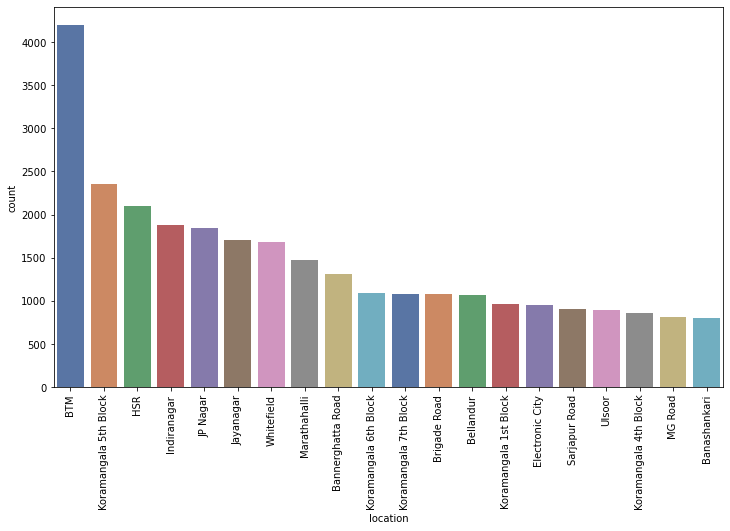

In [17]:
plt.figure(figsize=(12,7))
sns.countplot(df1['location'],order=df1['location'].value_counts()[:20].index,palette='deep')
plt.xticks(rotation=90)
plt.show()

**Proportion of Restaurants that provide online service**

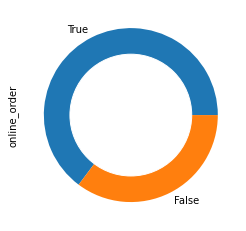

In [18]:
df1.online_order.value_counts().plot(kind='pie')
w_circle=plt.Circle((0,0),0.7,color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)

**Proportion of restaurants that allow booking tables**

<AxesSubplot:>

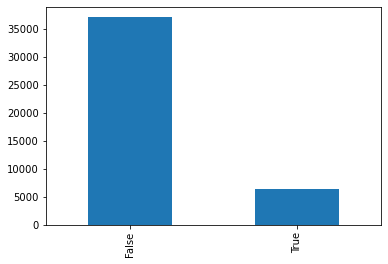

In [19]:
df1['book_table'].value_counts().plot(kind='bar')

**Most popular restaurant chains**

Text(0.5, 1.0, 'Top 10 Chain Restaurants')

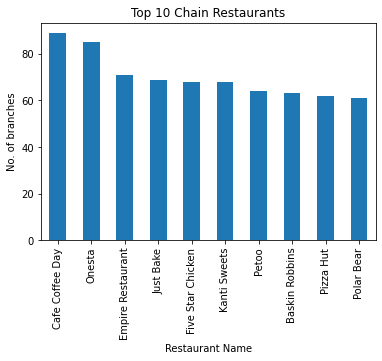

In [20]:
ax=df1.name.value_counts()[:10].plot(kind='bar')
plt.xlabel("Restaurant Name")
plt.ylabel("No. of branches")
plt.title("Top 10 Chain Restaurants")

**Impact of Online Ordering on Ratings**

It can be seen from the chart below that restaurants that allow ordering online tend to have higher ratings

<AxesSubplot:xlabel='rating'>

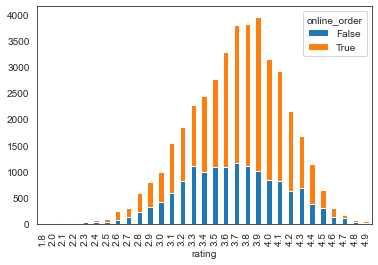

In [21]:
sns.set_style('white')
y=pd.crosstab(df1.rating,df1.online_order)
y.plot(kind='bar',stacked=True)

**Impact of Table Booking on Ratings**

It can be seen from the chart below that restaurants that allow table bookings tend to have higher ratings.

<AxesSubplot:xlabel='rating'>

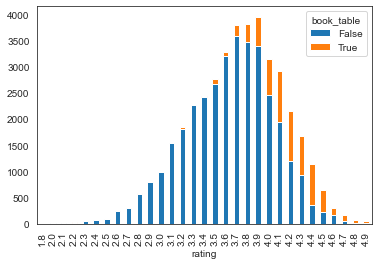

In [22]:
sns.set_style('white')
y=pd.crosstab(df1.rating,df1.book_table)
y.plot(kind='bar',stacked=True)

**Top 10 retaurant locations**

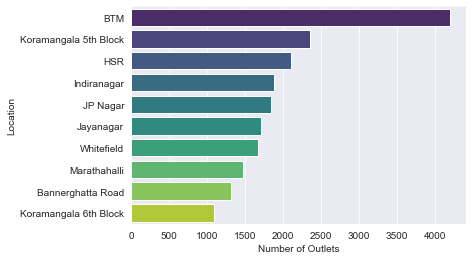

In [23]:
sns.set_style('darkgrid')
ch=df1['location'].value_counts()[:10]
sns.barplot(x=ch,y=ch.index,palette='viridis')
plt.xlabel('Number of Outlets')
plt.ylabel('Location')
plt.show()

## **Conclusion**
<ol>
    <li>Many orders are placed from BTM.</li>
    <li>Most of them prefer ordering online.</li>
    <li>North Indian Cuisines are ordered more often.</li>
<li>The rating of a restuarant is mainly based on online orders.</li>
    <li>Cafe Coffee Day has more branches in Bangalore.</li>
<li>Quick Bites are the most ordered restuarant types.</li>
</ol>

# **Predictive Models**

We now proceed to build a model that can predict ratings for new restaurants on the market to enable informed decision making by the stakeholders. The first step for this is to encode the columns containing string types into some sort of code.

In [24]:
def Encode(df1):
    for column in df1.columns[~df1.columns.isin(['rating', 'cost', 'votes'])]:
        df1[column] = df1[column].factorize()[0]
    return df1

encodedZomato = Encode(df1.copy())

In [25]:
encodedZomato['rating'].fillna(encodedZomato['rating'].mean(), inplace = True)
encodedZomato['rating'].isnull().sum()

0

In [26]:
encodedZomato.isna().sum()

name            0
online_order    0
book_table      0
rating          0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
city            0
dtype: int64

Next we try to plot a heatmap to get the correlation between the various available variables

<AxesSubplot:>

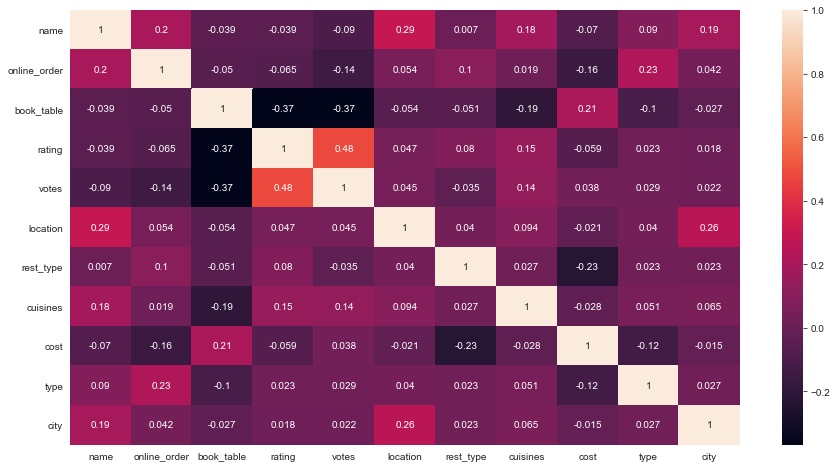

In [27]:
#Get Correlation between different variables
corr = encodedZomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

## **Splitting the Dataset**

Next up is the very important step of the deciding the train-test split for the different models. In this, after careful consideration, a train-test split of 4:1 is chosen. Also, the dependent and independent variables are declared for the models. The target variable here is rating which is what we aim to predict for future restaurants.

In [28]:
#Defining X and Y for model, Train-test split
x = encodedZomato[["online_order","book_table","votes","location","rest_type","cuisines","cost","type"]]
y = encodedZomato['rating']
#Getting Test and Training Set, change test_size to change the train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=353)
x_train.shape, y_train.shape

((34757, 8), (34757,))

## **Decison Tree Regressor**

In [29]:
#DTree Regression
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.00001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.8631492295355592

## **Linear Regressor**

In [30]:
#Some LinReg Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.2826945869899192

## **Gradient Boosting Regressor**

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_predict=gbr.predict(x_test)
r2_score(y_test,y_predict)

0.5298212012255903

## **XGBoost Regressor**

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.

In [32]:
!pip install xgboost
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xgb.fit(x_train, y_train)
y_predict=xgb.predict(x_test)

r2_score(y_test,y_predict)

0.9385565447703283

## **Random Forest Regressor**

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,random_state=50,min_samples_leaf=.00001)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
r2_score(y_test,y_pred)

0.9227603232783242

Now let us compare and contrast the performance of each of our models by arranging their r-squared scores in a tabulated format

In [34]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'XgBoost'],
    'Score' : [reg.score(x_test, y_test), DTree.score(x_test, y_test), rf.score(x_test, y_test),
               gbr.score(x_test, y_test), xgb.score(x_test, y_test)]})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,XgBoost,0.938557
2,Random Forest,0.922760
1,Decision Tree,0.863149
3,Gradient Boost,0.529821
0,Linear Regression,0.282695


# **Inferences**

It is clearly visible that the XGBoost regressor works the best with our dataset, which means that we'll be using this model to predict the ratings of the our future dataset.

# **Conclusions**

We have successfully trained and built multiple models on the dataset. We also found that the XGBoost regressor works incredibly well for this data. This analysis shows that once the model has been trained and tested on the data, we can actually predict the ratings for new restaurants as well with the independent variables being available to us.